<a href="https://colab.research.google.com/github/Orlova1199/MMO_22/blob/main/MMO_RK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РК1
### Студент: Орлова Светлана Михайловна
### Группа: ИУ5-24М
### Номер по списку группы (вариант): 12

#### Вариант задачи №1 - 12

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".

#### Вариант задачи №2 - 32

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

#### Дополнительное задание (по группам)
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".


##Импортирование необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
sns.set(style="ticks")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Задача 1 (№12)
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "логарифм - np.log(X)".

Произведем загрузку данных и выведем распределения признаков

In [2]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/content/MMO/wine.csv", sep=",")

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
data = data.drop('Id', 1)
data.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


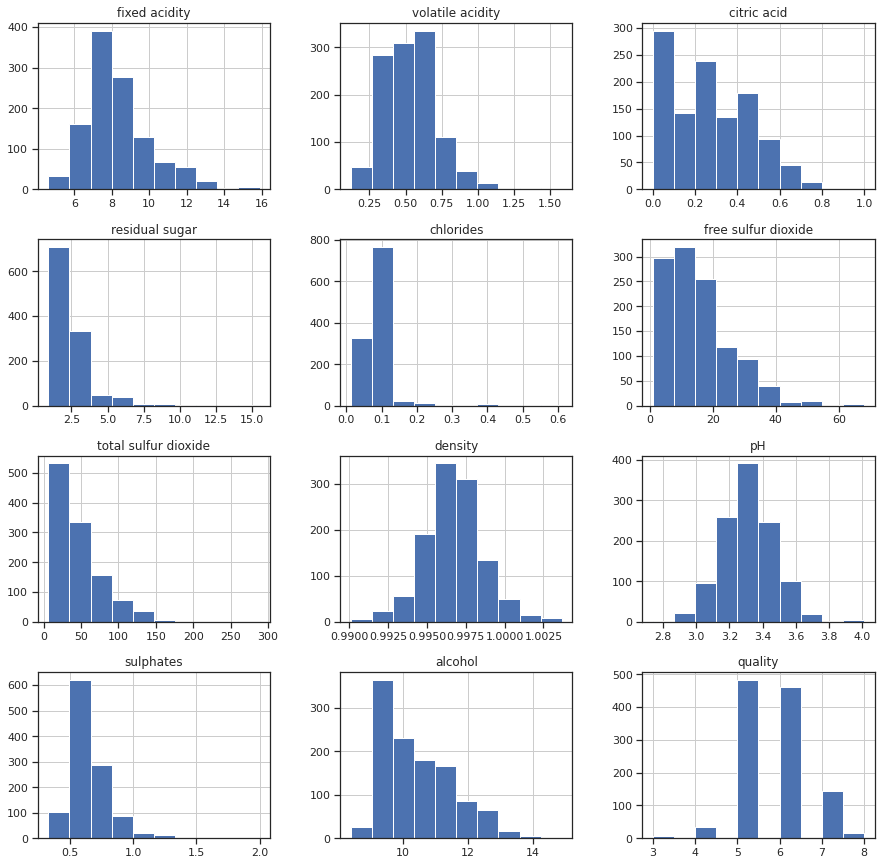

In [7]:
data.hist(figsize=(15,15))
plt.show()

###Исходное распределение 
Как видно, оно несколько отличается от нормального распределения

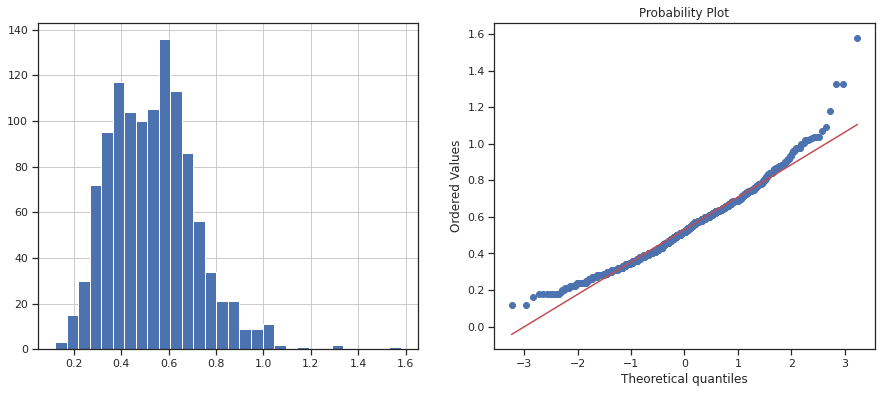

In [8]:
diagnostic_plots(data, 'volatile acidity')

Побробуем провести нормализацию с помощью функции "логарифм - np.log(X)"

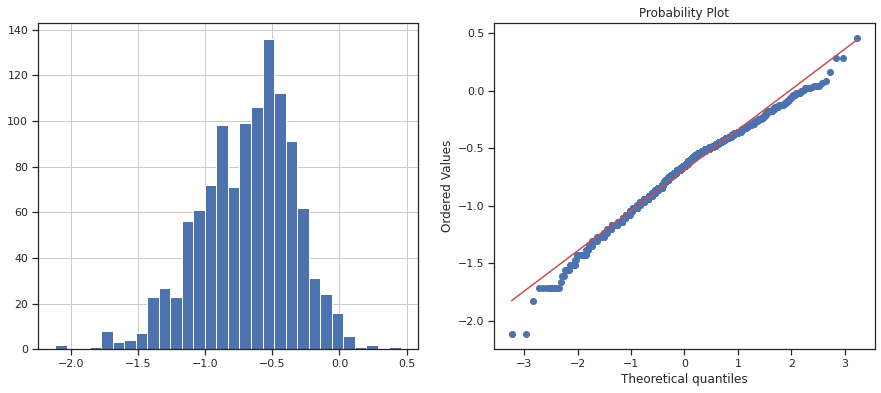

In [10]:
#Логарифмическое преобразование
data['volatile acidity_log'] = np.log(data['volatile acidity'])
diagnostic_plots(data, 'volatile acidity_log')

Исходя из полученного графика, видно, что с помощью функции "логарифм - np.log(X)" удалось успешно нормализовать признак "volatile acidity" (летучая кислотность)

## Задача 2 (№32)
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

Подготовим *DataFrame* на основе нашего набора данных из "Задания №1"

In [11]:
wine_X = data.drop('quality', 1).values
wine_y= data['quality'].values
wine_feature_names = list(data.drop('quality', 1).keys())
wine_x_df = pd.DataFrame(data=wine_X, columns=wine_feature_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Используем *логистическую регрессию* и выведем *коэффициенты регрессии*

In [12]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-1.23538330e-01,  5.86555828e-01,  1.16997439e+01,
         4.60806453e-01,  1.34309747e+00, -2.64598447e-02,
        -6.72112600e-02, -2.42905415e+00,  9.60415216e+00,
        -1.61413184e+00, -2.63874298e+00,  8.80869220e+00],
       [ 1.27306677e-01,  1.21215788e+00, -1.08446960e-04,
         7.60712240e-02,  3.63093399e+00,  1.28473624e-02,
        -1.20400123e-02, -7.18814263e+00,  3.63477513e+00,
         9.89899788e-01, -2.73830086e-01,  1.91217159e+00],
       [-1.71264728e-01, -1.21230977e+00,  1.56080451e+00,
        -1.96435705e-02,  1.85063550e+00, -1.37721714e-02,
         1.38815880e-02,  7.69226812e+00, -4.90022007e-01,
        -2.95023058e+00, -9.10323924e-01,  2.00003737e+00],
       [ 1.72043005e-01, -6.17780683e+00, -1.98568610e+00,
        -6.60576899e-02,  1.45394117e+00,  1.81105598e-02,
        -1.13738814e-02, -1.33793101e+00,  1.01490739e+00,
         1.06596939e+00,  2.53495053e-01,  2.24808506e+00],
       [ 1.48319310e-02, -3.80593648e+00,  7.5066448

Получили, что все признаки являются "*хорошими*" и важными

In [13]:
# Все признаки являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(wine_X, wine_y)
for feature, flag in zip(wine_feature_names, sel_e_lr1.get_support()):
  print(feature, ':', flag)

fixed acidity : True
volatile acidity : True
citric acid : True
residual sugar : True
chlorides : True
free sulfur dioxide : True
total sulfur dioxide : True
density : True
pH : True
sulphates : True
alcohol : True
volatile acidity_log : True


Используем *линейный классификатор на основе SVM* и выведем *коэффициенты регрессии*

In [14]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(wine_X, wine_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.83020930e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -8.80603585e-02,  0.00000000e+00],
       [-2.74243132e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.33594768e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -6.32577380e-02,  0.00000000e+00],
       [ 1.72883802e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -8.85111380e-03,
         8.80878929e-03,  0.00000000e+00,  4.05745101e-01,
         0.00000000e+00, -1.76202948e-01,  1.20151844e-01],
       [-7.53387686e-03,  0.00000000e+00,  0.00000000e+00,
        -7.08818478e-03,  0.00000000e+00,  1.00699011e-02,
        -7.06473406e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.96680024e-03,  0.00000000e+00],
       [-7.02968092e-03,  0.00000000e+00,  0.0000000

"*Хорошими*" и важными признакамии являются только признаки с флагом *True*. Остальные можно отбросить для дальнейшей работы

In [15]:
# Признаки с флагом False можно отбросить для дальнейшей работы
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(wine_X, wine_y)
for feature, flag in zip(wine_feature_names, sel_e_lr2.get_support()):
  print(feature, ':', flag)

fixed acidity : True
volatile acidity : False
citric acid : False
residual sugar : True
chlorides : False
free sulfur dioxide : True
total sulfur dioxide : True
density : False
pH : True
sulphates : False
alcohol : True
volatile acidity_log : True


## Дополнительное задание
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

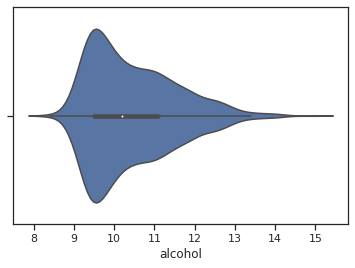

In [19]:
sns.violinplot(x=data['alcohol'])

Построили скрипичную диаграмму (violin plot), показыающую распределение значений колонки *alcohol* (крепость вина).